## Feature scaling using k-Nearest Neighbours

To demonstrate the importance of feature scaling using k-Nearest Neighbours the example below shows the accuracy with and without feature scaling using mean scaling

First libraries and import and some functions are defined

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import time

%matplotlib inline

start = time.time()

def normalise(dataframe):
    """return values using a mean normalisation"""
    df_normalised = dataframe
    for feature_name in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']:
        df_mean = dataframe[feature_name].mean()
        df_min = dataframe[feature_name].min()
        df_max = dataframe[feature_name].max()
        df_normalised[feature_name] = (df_normalised[feature_name] - df_mean) / (df_max - df_min)
    return df_normalised

def dist_between(a, b):
    """returns the Euclidean distance between two points"""
    a = np.array(a)
    b = np.array(b)
    return np.linalg.norm(a - b, axis=1)

def knn(datapoint, X_train, y_train, k):
    """searches through all points to find the closest to the datapoint"""
    datapoint = np.array(datapoint)

    a = dist_between(X_train, datapoint)
    a = a.argsort()[:k]
    _, count = np.unique(y_train[a], return_counts=True)
    return stats.mode(y_train[a])[0], np.max(count)/k*100

The dataset is loaded with the training and test data split out.  The variable neighbours definies up to how many neighbours will be shown starting from 1

In [2]:
df = sns.load_dataset("penguins", cache=False)
df = df.fillna(0)

neighbours = 20
random_seed = neighbours

X_train, X_test, y_train, y_test = train_test_split(df.drop(["species","island","sex"],axis=1).values,
                                                        df["species"].values, test_size=0.25, random_state=random_seed)

X_train_norm, X_test_norm, y_train, y_test = train_test_split(normalise(df).drop(["species","island","sex"],axis=1).values,
                                                df["species"].values, test_size=0.25, random_state=random_seed)

predicted_species = np.array([[""]]*len(y_test), dtype="<U10")
accuracy_score = np.array([[0,0,0]]*neighbours, dtype="float32")

Make predictions for both unscaled and scaled values of the test sets

In [3]:
#loop over all neighbours finding accuracy for scaled and unscaled data
for j in range(1, neighbours+1):
    
    accuracy_score[j-1, 0] = j
    #loop through each datapoint to get accuracy for the set
    for i in range(0,len(y_test)):
        predicted_species[i], prediction_certainty = knn(X_test[i], X_train, y_train, j)
    accuracy_score[j-1, 1] = round(metrics.accuracy_score(y_test, predicted_species),2)
    

    for i in range(0,len(y_test)):
        predicted_species[i], prediction_certainty = knn(X_test_norm[i], X_train_norm, y_train, j)
    accuracy_score[j-1, 2] = round(metrics.accuracy_score(y_test, predicted_species),2)

Display graphs showing the accuracy for each trial

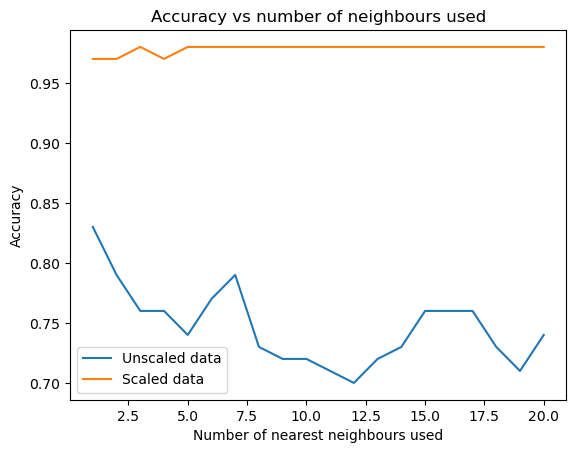

Time: 1.38 seconds


In [4]:
#plot graph
plt.plot(accuracy_score[:,0], accuracy_score[:,1], label="Unscaled data")
plt.plot(accuracy_score[:,0], accuracy_score[:,2], label="Scaled data")
plt.legend(loc="best")
plt.title("Accuracy vs number of neighbours used")
plt.xlabel("Number of nearest neighbours used")
plt.ylabel("Accuracy")
plt.show()

end = time.time()
print(f"Time: {end-start:.3} seconds")

The below code is to get the same output but by using existing (and more optimised) libraries resulting in running time being 2 to 3 times faster

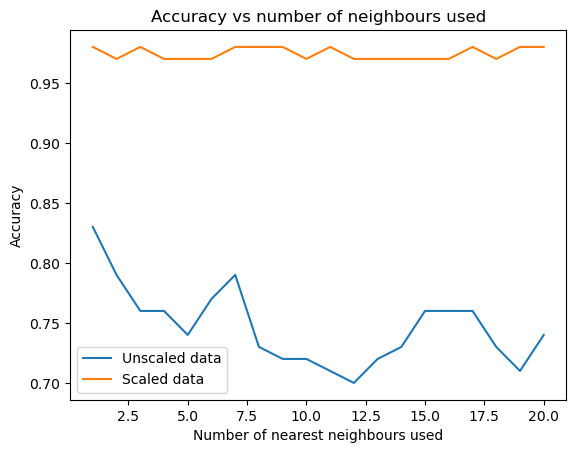

Time: 0.5 seconds


In [5]:
start = time.time()
##Code optimised by using libraries

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

df = sns.load_dataset("penguins", cache=False) #to compare times
df = df.fillna(0)

X_train, X_test, y_train, y_test = train_test_split(df.drop(["species","island","sex"],axis=1).values,
                                                        df["species"].values, test_size=0.25, random_state=random_seed)
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

accuracy_score = np.array([[0,0,0]]*neighbours, dtype="float32")

#loop over all neighbours finding accuracy for scaled and unscaled data
for j in range(1, neighbours+1):
    
    accuracy_score[j-1, 0] = j
    
    knn = KNeighborsClassifier(n_neighbors = j).fit(X_train, y_train)
    predicted_species = knn.predict(X_test)
    accuracy_score[j-1, 1] = round(metrics.accuracy_score(y_test, predicted_species),2)
    
    knn = KNeighborsClassifier(n_neighbors = j).fit(X_train_norm, y_train)
    predicted_species = knn.predict(X_test_norm)
    accuracy_score[j-1, 2] = round(metrics.accuracy_score(y_test, predicted_species),2)
    
#plot graph
plt.plot(accuracy_score[:,0], accuracy_score[:,1], label="Unscaled data")
plt.plot(accuracy_score[:,0], accuracy_score[:,2], label="Scaled data")
plt.legend(loc="best")
plt.title("Accuracy vs number of neighbours used")
plt.xlabel("Number of nearest neighbours used")
plt.ylabel("Accuracy")  
plt.show()
end = time.time()
print(f"Time: {end-start:.3} seconds")